<a href="https://colab.research.google.com/github/rhea-vidhani/heart_classification/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Upload the dataset***

In [1]:
#Upload the file
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
#Load the dataset
import pandas as pd
df = pd.read_csv('heart.csv')

# ***Data Understanding***

In [3]:
#Display first few rows of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#Display last few rows of the dataset
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
#Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Display total number of rows and columns
df.shape

(918, 12)

In [7]:
#Display summary statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#Display unique values of column - 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'
print(df['Sex'].unique())
print(df['ChestPainType'].unique())
print(df['RestingECG'].unique())
print(df['ExerciseAngina'].unique())
print(df['ST_Slope'].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


# ***Data Cleaning***

In [9]:
#Identify missing values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [10]:
#Identify duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [11]:
#Encode column - 'Gender' and 'ExerciseAngina' (0/1)
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})

In [12]:
#Encode column - 'ChestPainType', 'RestingECG', 'ST_Slope'
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=False)

In [13]:
#Final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ST_Slope_Down      918 non

# ***Explanatory Data Analysis***

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


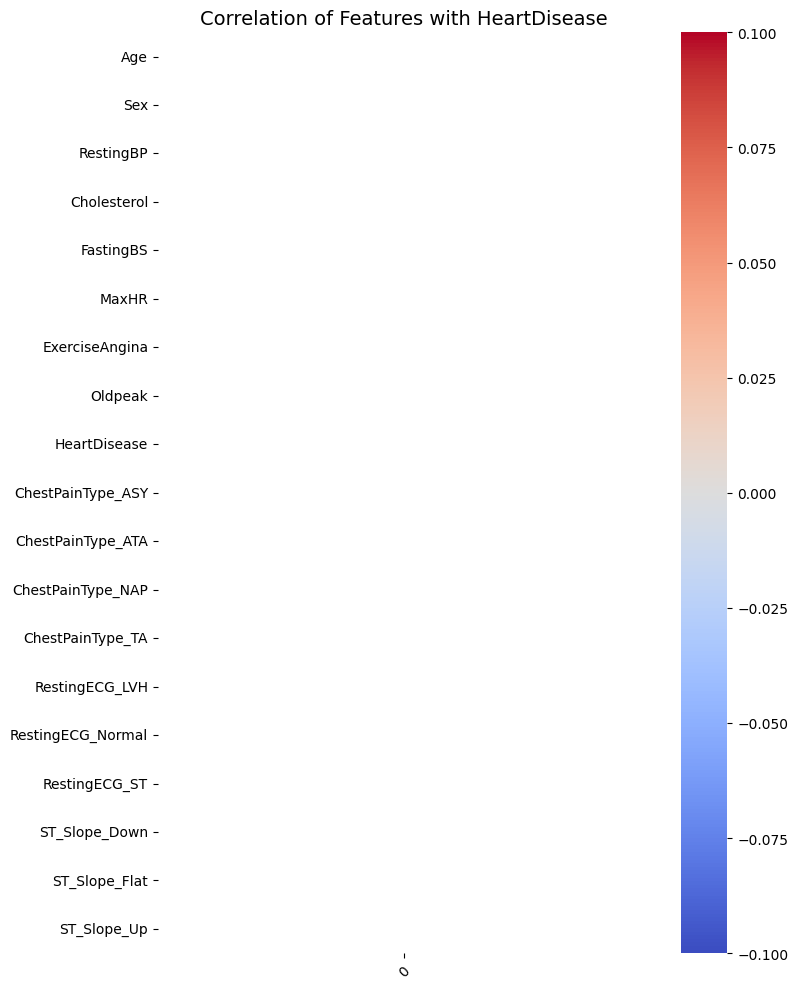

In [14]:
#Correlation analysis with target variable (HeartDisease)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_target = df.corr(numeric_only=True).corrwith(df['HeartDisease']).sort_values()

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_target.to_frame(),
            annot=True,
            cmap='coolwarm',
            cbar=True,
            linewidths=0.5)

plt.title('Correlation of Features with HeartDisease', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***Train - Test split***

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

In [16]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
rf_train_recall = recall_score(y_train, rf_train_preds)
rf_test_recall = recall_score(y_test, rf_test_preds)
rf_train_f1 = f1_score(y_train, rf_train_preds)
rf_test_f1 = f1_score(y_test, rf_test_preds)
rf_train_precision = precision_score(y_train, rf_train_preds)
rf_test_precision = precision_score(y_test, rf_test_preds)
rf_train_roc_auc = roc_auc_score(y_train, rf_train_preds)
rf_test_roc_auc = roc_auc_score(y_test, rf_test_preds)

# Evaluation
print("Random Forest Classifier")
print("Training Accuracy:", rf_train_accuracy)
print("Testing Accuracy:", rf_test_accuracy)
print("Training Recall:", rf_train_recall)
print("Testing Recall:", rf_test_recall)
print("Training F1 Score:", rf_train_f1)
print("Testing F1 Score:", rf_test_f1)
print("Training Precision:", rf_train_precision)
print("Testing Precision:", rf_test_precision)
print("Training ROC AUC:", rf_train_roc_auc)
print("Testing ROC AUC:", rf_test_roc_auc)

Random Forest Classifier
Training Accuracy: 1.0
Testing Accuracy: 0.8858695652173914
Training Recall: 1.0
Testing Recall: 0.9117647058823529
Training F1 Score: 1.0
Testing F1 Score: 0.8985507246376812
Training Precision: 1.0
Testing Precision: 0.8857142857142857
Training ROC AUC: 1.0
Testing ROC AUC: 0.8827116212338593


In [17]:
#Install XGBoost Classifier
!pip install xgboost

In [18]:
#XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)
xgb_train_precision = precision_score(y_train, xgb_train_preds)
xgb_test_precision = precision_score(y_test, xgb_test_preds)
xgb_train_recall = recall_score(y_train, xgb_train_preds)
xgb_test_recall = recall_score(y_test, xgb_test_preds)
xgb_train_f1 = f1_score(y_train, xgb_train_preds)
xgb_test_f1 = f1_score(y_test, xgb_test_preds)
xgb_train_roc_auc = roc_auc_score(y_train, xgb_train_preds)
xgb_test_roc_auc = roc_auc_score(y_test, xgb_test_preds)

#Evaluation
print("\nXGBoost Classifier")
print("Training Accuracy:", xgb_train_accuracy)
print("Testing Accuracy:", xgb_test_accuracy)
print("Training Precision:", xgb_train_precision)
print("Testing Precision:", xgb_test_precision)
print("Training Recall:", xgb_train_recall)
print("Testing Recall:", xgb_test_recall)
print("Training F1 Score:", xgb_train_f1)
print("Testing F1 Score:", xgb_test_f1)
print("Training ROC AUC:", xgb_train_roc_auc)
print("Testing ROC AUC:", xgb_test_roc_auc)


XGBoost Classifier
Training Accuracy: 1.0
Testing Accuracy: 0.8804347826086957
Training Precision: 1.0
Testing Precision: 0.9
Training Recall: 1.0
Testing Recall: 0.8823529411764706
Training F1 Score: 1.0
Testing F1 Score: 0.8910891089108911
Training ROC AUC: 1.0
Testing ROC AUC: 0.8802008608321378


# ***Cross-Validation***

In [19]:
#Random forest classifier
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf_cv_results = cross_validate(rf, X, y, cv=cv, scoring=scoring)

print("Random Forest 5-Fold CV Results")
for metric in scoring:
    mean_score = np.mean(rf_cv_results[f'test_{metric}'])
    print(f"{metric.capitalize()}: {mean_score:.4f}")

Random Forest 5-Fold CV Results
Accuracy: 0.8747
Precision: 0.8710
Recall: 0.9095
F1: 0.8895
Roc_auc: 0.9284


In [20]:
#XGBoost Classifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_cv_results = cross_validate(xgb, X, y, cv=cv, scoring=scoring)

print("XGBoost 5-Fold CV Results")
for metric in scoring:
    mean_score = np.mean(xgb_cv_results[f'test_{metric}'])
    print(f"{metric.capitalize()}: {mean_score:.4f}")

XGBoost 5-Fold CV Results
Accuracy: 0.8573
Precision: 0.8567
Recall: 0.8938
F1: 0.8740
Roc_auc: 0.9175


# ***Hyperparameter-Tuning***

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X, y)
xgb_grid_search.fit(X, y)

print("Best Parameters and F1 Score")
print("\nRandom Forest:")
print("Best Params:", rf_grid_search.best_params_)
print("Best F1 Score:", rf_grid_search.best_score_)

print("\nXGBoost:")
print("Best Params:", xgb_grid_search.best_params_)
print("Best F1 Score:", xgb_grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters and F1 Score

Random Forest:
Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score: 0.8542852700543389

XGBoost:
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score: 0.8536134675299902


# ***Model Implementation and Evaluation***

In [22]:
#Random forest classifier
best_rf = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
best_rf.fit(X_train, y_train)
rf_preds = best_rf.predict(X_test)

#XGBoost Classifier
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=7,
    n_estimators=100,
    subsample=0.8,
    eval_metric='logloss',
    random_state=42
)
best_xgb.fit(X_train, y_train)
xgb_preds = best_xgb.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model("Random Forest (Tuned)", y_test, rf_preds)
evaluate_model("XGBoost (Tuned)", y_test, xgb_preds)


 Random Forest (Tuned) Evaluation
Accuracy: 0.875
Precision: 0.8623853211009175
Recall: 0.9215686274509803
F1 Score: 0.8909952606635071
ROC AUC: 0.8693208990913439
Confusion Matrix:
 [[67 15]
 [ 8 94]]

 XGBoost (Tuned) Evaluation
Accuracy: 0.875
Precision: 0.8691588785046729
Recall: 0.9117647058823529
F1 Score: 0.8899521531100478
ROC AUC: 0.8705164992826399
Confusion Matrix:
 [[68 14]
 [ 9 93]]


# ***Model Deployment***

In [23]:
#import gradio
!pip install gradio

In [24]:
import gradio as gr
import pandas as pd
import random

def random_prediction():
    index = random.randint(0, len(X_test) - 1)
    row = X_test.iloc[index]
    actual = y_test.iloc[index]
    prediction = best_rf.predict([row])[0]

    result = row.to_dict()
    result["Predicted"] = "Heart Disease" if prediction == 1 else "No Heart Disease"
    result["Actual"] = "Heart Disease" if actual == 1 else "No Heart Disease"
    result["Sample Index"] = index

    return result

interface = gr.Interface(
    fn=random_prediction,
    inputs=[],
    outputs="json",
    title="Random Heart Disease Prediction",
    description="Randomly selects a test case, displays all feature values, and compares model prediction with actual result."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://424ad3592fb8d26d5e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [25]:
# Save the trained model to a file
import joblib
joblib.dump(best_rf, 'random_forest_heart_disease.pkl')
print("Model saved as 'random_forest_heart_disease.pkl'")

Model saved as 'random_forest_heart_disease.pkl'
